<a href="https://colab.research.google.com/github/souhirkammoun/MultilayerPerceptronExamples/blob/master/MLPinKeraswithmnistdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

nb_classes = 10

In [10]:
#Load the MNIST Dataset
from keras.datasets import mnist
from keras.utils import np_utils

(X_train, y_train), (X_test, y_test) = mnist.load_data()
# we can look at the shape of the dataset
X_train.shape
# it appears that we have 60,000 samples in our training set, and the images are 28 pixels x 28 pixels each. 


(60000, 28, 28)

In [3]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


In [13]:
#Data preperation
# we want to transform our dataset from having shape (n, width, height) to (n, width *height).
print(X_train.shape)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
print(X_train.shape)
#we can convert our data type to float32 and normalize our data values to the range [0, 1].
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255
print(y_train.shape)
#We should have 10 different classes, one for each digit, but it looks like we only have a 1-dimensional array.
# we must Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(Y_train.shape)

(60000, 784)
(60000, 784)
(60000,)
(60000, 10)


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train)

[0 1 2 3 4 5 6 7 8 9]
[1 0 0 0 0 0 0 0 0 0]


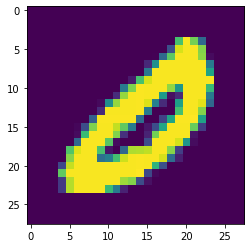

In [15]:
# test the dataset
plt.imshow(X_train[5].reshape(28, 28))
print(np.asarray(range(10)))
print(Y_train[5].astype('int'))

In [0]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import SGD
# create the model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(nb_classes))
model.add(Activation("softmax"))


model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001), metrics=['accuracy'])

In [20]:
#Training the model 
network_history = model.fit(X_train, Y_train, batch_size=128, epochs=50, validation_data=(X_val, Y_val), verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 45000 samples, validate on 15000 samples
Epoch 1/50





45000/45000 [==============================] - 5s 121us/step - loss: 2.3025 - acc: 0.1119 - val_loss: 2.3024 - val_acc: 0.1121
Epoch 2/50
45000/45000 [==============================] - 5s 102us/step - loss: 2.3023 - acc: 0.1124 - val_loss: 2.3022 - val_acc: 0.1121
Epoch 3/50
45000/45000 [==============================] - 5s 101us/step - loss: 2.3021 - acc: 0.1124 - val_loss: 2.3021 - val_acc: 0.1121
Epoch 4/50
45000/45000 [==============================] - 5s 101us/step - loss: 2.3020 - acc: 0.1124 - val_loss: 2.3020 - val_acc: 0.1121
Epoch 5/50
45000/45000 [==============================] - 5s 104us/step - loss: 2.3019 - acc: 0.1124 - val_loss: 2.3019 - val_acc: 0.1121
Epoch 6/50
45000/45000 [==============================] - 5s 105us/step - loss: 2.3018 - acc: 0.1124 - val_loss: 2.3018 - val_acc: 0.1121
Epoch 7/50
45000/450

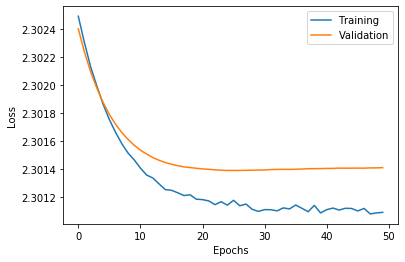

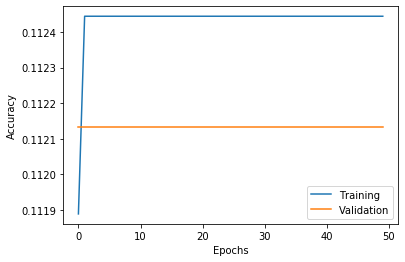

In [21]:
def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['acc'])
    plt.plot(network_history.history['val_acc'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(network_history)

1


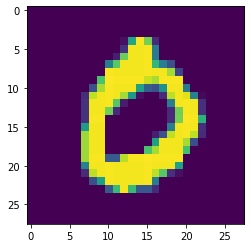

In [22]:
#predection 

from keras.preprocessing import image

plt.imshow(X_test[3].reshape(28, 28))
img = X_test[3].reshape(-1, 784)

prediction = model.predict(img)
print(np.argmax(prediction))